In [ ]:
def main():
    import pandas as pd
    import numpy.random as np
    
    # Import data you want to analyse
    print('Please input your datafile name')
    data_filename = input()
    df = pd.read_excel(data_filename)
    
    # Get the columns you want
    df_need = df[['Product List', 'Industry', 'Please rate your overall satisfaction with the training.',
             'Expectations [Overall, how was your experience compared to your expectations coming into the class?]',
             'Performance [The skills I learned today will help me perform better in my role.]',
             'How likely are you to recommend SNP to a friend or colleague?']]
    
    # Basic processing
    df_need = df_need.dropna()
    df_need = df_need.replace({'Expectations [Overall, how was your experience compared to your expectations coming into the class?]':
                    {'Worse than Expected':1, 'Almost as Expected': 2, 'As Expected':3, 'Better than Expected':4, 
                     'Much Better than Expected':5}})
    df_need = df_need.replace({'Performance [The skills I learned today will help me perform better in my role.]':
                           {'Strongly Disagree':1, 'Disagree':2, 'Mixed':3, 'Agree':4, 'Strongly Agree':5}})
    df_need['How likely are you to recommend SNP to a friend or colleague?'] = pd.cut(df_need['How likely are you to recommend SNP to a friend or colleague?'],bins = 5,labels = [1,2,3,4,5])
    df_need['How likely are you to recommend SNP to a friend or colleague?'] = pd.to_numeric(df_need['How likely are you to recommend SNP to a friend or colleague?'])
    
    # Calculate the mean value of industry and product list
    df_need_mean = df_need.groupby(['Industry','Product List'],as_index = False).mean()
    df_need_mean['Please rate youroverall satisfaction with the training.'] = df_need_mean['Please rate your overall satisfaction with the training.'].round(2)
    df_need_mean['Expectations [Overall, how was your experience compared to your expectations coming into the class?]'] = df_need_mean['Expectations [Overall, how was your experience compared to your expectations coming into the class?]'].round(2)
    df_need_mean['Performance [The skills I learned today will help me perform better in my role.]'] = df_need_mean['Performance [The skills I learned today will help me perform better in my role.]'].round(2)
    df_need_mean['How likely are you to recommend SNP to a friend or colleague?'] = df_need_mean['How likely are you to recommend SNP to a friend or colleague?'].round(2)
    df_need_mean['Total Average Rating'] = (df_need_mean['Please rate your overall satisfaction with the training.']
                                        +df_need_mean['Expectations [Overall, how was your experience compared to your expectations coming into the class?]']
                                        +df_need_mean['Performance [The skills I learned today will help me perform better in my role.]']
                                        +df_need_mean['How likely are you to recommend SNP to a friend or colleague?'])/4
    df_need_mean['Total Average Rating'] = df_need_mean['Total Average Rating'].round(2)
    
    # Get the final result
    df_final = df_need_mean[['Industry', 'Product List', 'Total Average Rating']]     
    
    # Get the specific industry's result
    print('Which industry do you want to show?')
    industry_name = input()
    df_final_industry = df_final[df_final['Industry'] == industry_name]

        
    # Get top product list
    print('How many best product list do you want to show')
    n = int(input())
    df_final_industry_top_n = df_final_industry.sort_values(['Total Average Rating'], ascending = [0])
    print(df_final_industry_top_n.head(n))
    
    # Export the final result
    print('Do you want a final result of all industries?')
    answer = input()
    if answer == 'Yes':
        df_final.to_excel('Final Average Rating.xlsx', index=False)
        print('The final average rating datafile is ready')
        print('End')
    else:
        print('End')
    
if __name__ == "__main__":
    main()

Please input your datafile name
SNP Data Analysis.xlsx
Which industry do you want to show?
E-Learning
How many best product list do you want to show
5
      Industry                                      Product List  \
24  E-Learning                                    T-Manager Mojo   
23  E-Learning                         T-Influence Without Power   
21  E-Learning                        T-Delivering Hard Feedback   
22  E-Learning                           T-Getting the Work Done   
26  E-Learning  T-Working Well Together (Trust & Accountability)   

    Total Average Rating  
24                  4.24  
23                  4.00  
21                  3.99  
22                  3.86  
26                  3.75  
Do you want a final result of all industries?


Please input your datafile name
SNP Data Analysis.xlsx
Which industry do you want to show?
Internet


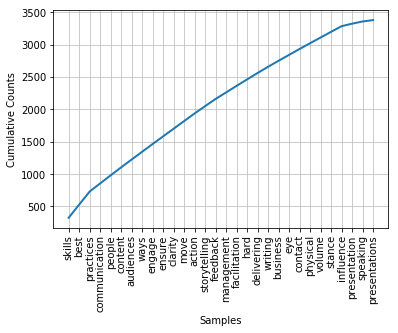

In [8]:

def main():
    import pandas as pd
    import numpy.random as np
    
    # Extrate the data we want
    print('Please input your datafile name')
    data_filename = input()
    df = pd.read_excel(data_filename)
    df_text = df[['Product List', 'Industry', 'Going forward, what other skills are you interested in developing? ']]
    df_text = df_text.dropna()
    
    # Basic processing
    import string
    df_text['Going forward, what other skills are you interested in developing? '] = df_text['Going forward, what other skills are you interested in developing? '].apply(lambda x: " ".join(x.lower() for x in x.split()))
    punctuation_exclude = set(string.punctuation)
    df_text['Going forward, what other skills are you interested in developing? '] = df_text['Going forward, what other skills are you interested in developing? '].apply(lambda x: "".join(i for i in x if i not in punctuation_exclude))
    df_text = df_text.dropna()
    
    # Word frequency of Going Forward
    import nltk
    from nltk.tokenize import sent_tokenize
    from nltk.tokenize import word_tokenize as WordTokenizer
    from nltk.corpus import stopwords
    from nltk.probability import FreqDist
    import matplotlib.pyplot as plt
    print('Which industry do you want to show?')
    industry_name = input()
    df_text_industry = df_text[df_text['Industry'] == industry_name]
    # Seperate the words of every rows
    def word_tokenizer(df, col):
        token = []
        for item in df[col]:
            token.append(WordTokenizer(item))
        return token
    token = word_tokenizer(df_text_industry, 'Going forward, what other skills are you interested in developing? ')
    # Gather all the words in one group
    token_split = []
    for i in token:
        token_split = token_split + i
    # Delete stopwords
    stop_words = set(stopwords.words("english"))
    stop_words_del = []
    for w in token_split:
        if w not in stop_words:
            stop_words_del.append(w)
    # Words frequency
    FreqDist(stop_words_del).plot(30, cumulative = 'False')
    plt.show()

if __name__ == "__main__":
    main()

In [8]:
def main():
    import pandas as pd
    import numpy.random as np
    # Read the data into notebook
    print('Please input your datafile name')
    data_filename = input()
    df_sentiment = pd.read_csv(data_filename)
    
    # Select the columns we need (low ratings with 1.0 ~ 3.0)
    df_sentiment_low_rating = df_sentiment[df_sentiment['Please rate your overall satisfaction with the training.'] < 4.0]
    df_sentiment_text_analysis = df_sentiment_low_rating[['Product List', 'Please explain your ratings in more detail.', 'What can we do to improve this program?']]
    df_sentiment_text_analysis = df_sentiment_text_analysis.dropna()
    
    # Select the industries you want to analyze
    print('Please input the industry name you want to analyze')
    product_name = input()
    df_sentiment_text_analysis_product = df_sentiment_text_analysis[df_sentiment_text_analysis['Product List'] == product_name]
    print(df_sentiment_text_analysis_product)
    
    # Export data or not
    print('Do you want to export the result?')
    answer = input()
    if answer == 'Yes':
        df_sentiment_text_analysis_product.to_csv('Final Result.csv', index=False)
        print('The final result datafile is ready')
        print('End')
    else:
        print('End')
if __name__ == "__main__":
    main() 

Please input your datafile name
SNP - Data Samples - added Sentiment.csv
Please input the industry name you want to analyze
T-Other
     Product List        Please explain your ratings in more detail.  \
45        T-Other  I feel bad giving these ratings, but I also fe...   
51        T-Other  I came in with low expectations, and they were...   
54        T-Other  It's not really targetted at me — I'm fairly a...   
125       T-Other  Good content, would’ve loved more practical sk...   
288       T-Other  Lot of questions got answered with a question,...   
1555      T-Other  I find it very engaging, a lot of good convers...   
1640      T-Other  This module felt like it had the least strateg...   
1642      T-Other  The conversation got very derailed during the ...   
1644      T-Other  it didn't go into enough detail; definitions w...   
1811      T-Other  The training would be more effective if we wen...   
2162      T-Other  Seems rushed, forced, too many call center ref...   
2317